## Full Example of k-NN Classification


# 1. Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load Dataset


In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for 2D plotting
y = iris.target

# 3. Split Dataset into Training and Testing


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Feature Scaling


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Train the k-NN Model
We can change the number of neighbors (n_neighbors) to experiment with different k values.


In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# 6. Make Predictions


In [6]:
y_pred = knn.predict(X_test)


# 7. Evaluate the Model


In [7]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  6  3]
 [ 0  4  7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.60      0.67      0.63         9
           2       0.70      0.64      0.67        11

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



# 8. Plotting the decision boundary


In [8]:
def plot_decision_boundary(X, y, model, title):
    # Define the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Spectral)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.colorbar(scatter)

# Plot the decision boundary for the training set


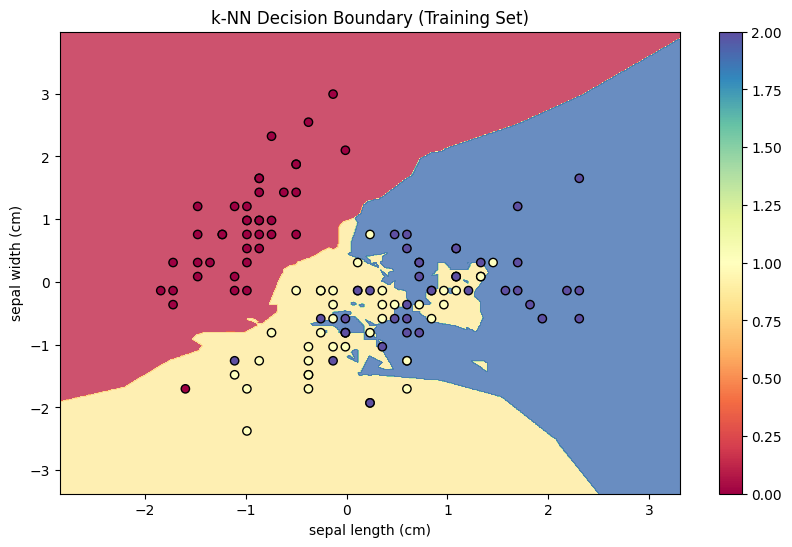

In [9]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, knn, title='k-NN Decision Boundary (Training Set)')
plt.show()

# Plot the decision boundary for the testing set


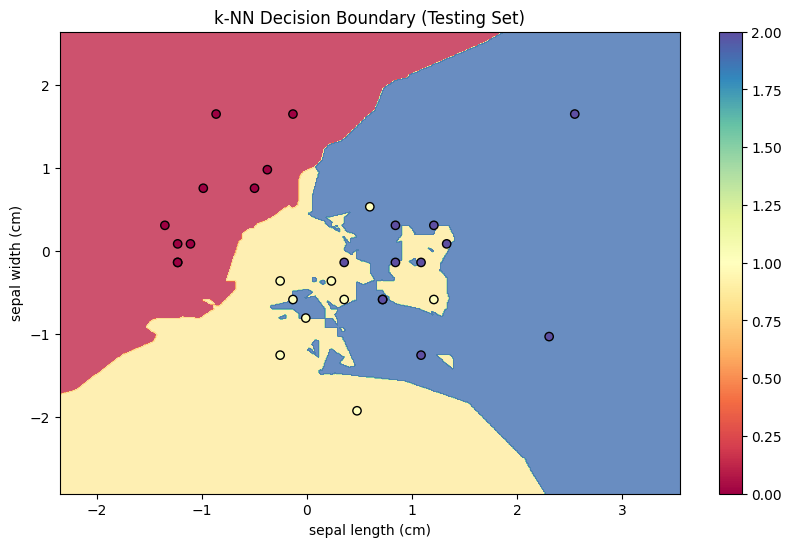

In [10]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test, y_test, knn, title='k-NN Decision Boundary (Testing Set)')
plt.show()